/var/folders/jh/8qnr5mvd3rlc1zcpbx5xqb_h0000gn/T/ipykernel_34608/2961210530.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


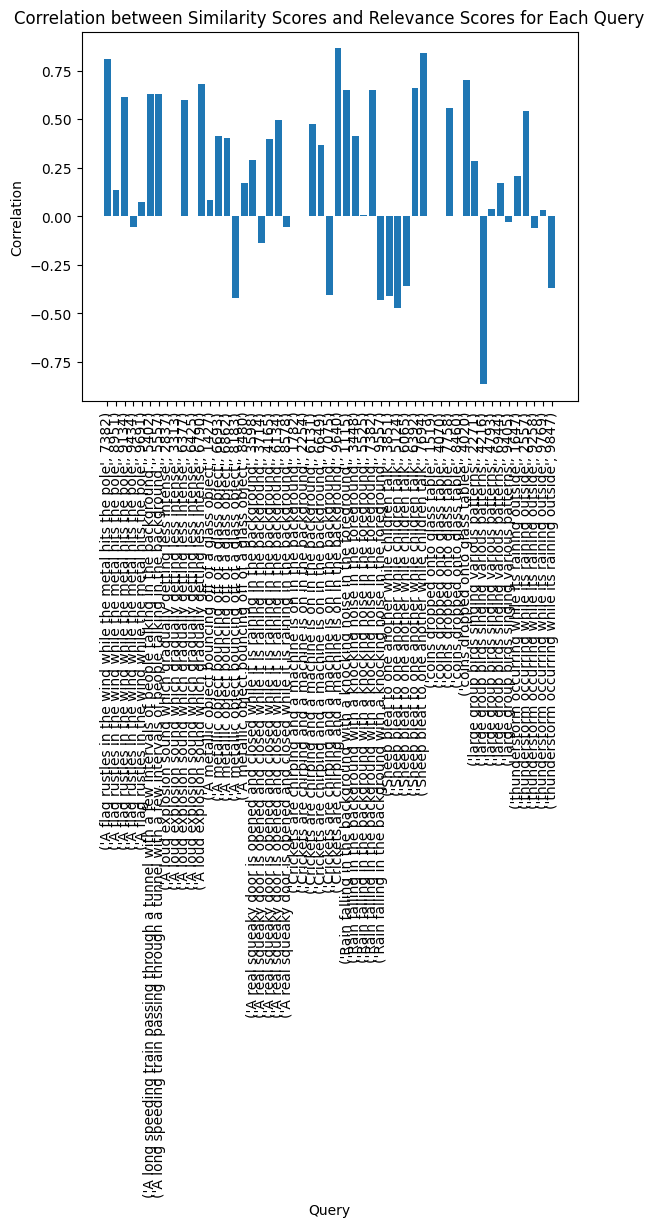

In [9]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('../results.csv')

# Normalize the similarity scores from -1 to 1 to a range of 0 to 1
data['normalized_similarity'] = (data['similarity_score_by_model'] + 1) / 2

# Normalize the relevance scores from 1 to 10 to a range of 0 to 1
data['normalized_relevance'] = (data['user_relevance_score'] - 1) / 9

# Group the data by the query and batch index
grouped_data = data.groupby(['query', 'batch_index'])

correlations = []
query_labels = []

# Iterate over each group and compute the correlation coefficient
for group_name, group_data in grouped_data:
    similarity_scores = group_data['normalized_similarity']
    relevance_scores = group_data['normalized_relevance']

    # correlation, p_value = stats.pearsonr(similarity_scores, relevance_scores)
    correlation = similarity_scores.corr(relevance_scores)
    correlations.append(correlation)
    query_labels.append(str(group_name))

# Plotting the correlations
fig, ax = plt.subplots()

ax.bar(query_labels, correlations)
ax.set_xlabel('Query')
ax.set_ylabel('Correlation')
ax.set_title('Correlation between Similarity Scores and Relevance Scores for Each Query')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()